## Notebook, how to properly encode cyclical features for use in deep learning.

- Predicting temperature from historical weather data for the city of Montreal.

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')

<ipython-input-2-f5d3a236d8b8>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [3]:
cities_temperature = pd.read_csv("/content/drive/MyDrive/datasets/Historical Hourly Weather Data 2012-2017/temperature.csv", parse_dates=['datetime'])
cities_temperature.sample(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
15151,2014-06-24 19:00:00,290.060,292.591333,292.858667,292.524667,298.491333,296.808,307.758667,308.225333,304.341333,...,301.408667,299.580,292.650,296.524667,296.489,298.540,307.150,296.875,293.150,294.724667
33465,2016-07-26 21:00:00,295.880,298.730000,306.400000,294.520000,307.480000,302.240,315.080000,315.500000,303.680000,...,304.600000,305.230,300.600,305.310000,292.235,300.800,308.150,304.260,299.985,300.840000
38342,2017-02-15 02:00:00,279.207,278.507000,285.132000,279.982000,285.707000,284.707,280.132000,286.007000,271.932000,...,271.757000,271.257,269.082,271.107000,278.882,281.382,279.557,283.707,283.707,280.832000
14697,2014-06-05 21:00:00,292.260,294.560000,294.800000,292.820000,298.380000,297.680,310.090000,313.210000,306.950000,...,297.880000,297.160,289.810,288.030000,291.901,295.730,303.150,294.180,291.990,291.601000
42938,2017-08-25 14:00:00,284.920,283.650000,287.160000,283.430000,292.160000,291.770,295.880000,300.950000,289.840000,...,294.150000,294.820,287.800,291.730000,306.732,304.150,311.170,306.720,306.350,304.150000


In [4]:
data = cities_temperature[['datetime', 'Montreal']]
data = data.rename(columns={'Montreal': 'temperature'})
data['temperature'] = data['temperature'] - 273.15
print(data.dtypes)

datetime       datetime64[ns]
temperature           float64
dtype: object


In [5]:
data.head(5)

,datetime,temperature
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,12.680000
2,2012-10-01 14:00:00,12.684650
3,2012-10-01 15:00:00,12.697790
4,2012-10-01 16:00:00,12.710929


In [6]:
data = data.fillna(method = 'bfill', axis=0).dropna()

count    45253.000000
mean         7.192744
std         11.953399
min        -29.850000
25%         -1.180000
50%          7.959000
75%         17.218333
max         34.730000
Name: temperature, dtype: float64


<ipython-input-7-3c755488e94d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.temperature)


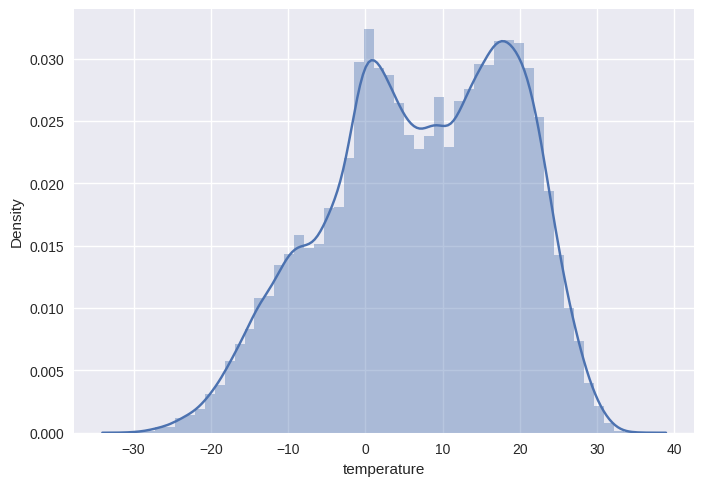

In [7]:
print(data.temperature.describe())
ax = sns.distplot(data.temperature)

##Cyclical Features

In [8]:
data['hour'] = data.datetime.dt.hour
sample = data[:168] # roughly the first week of the data

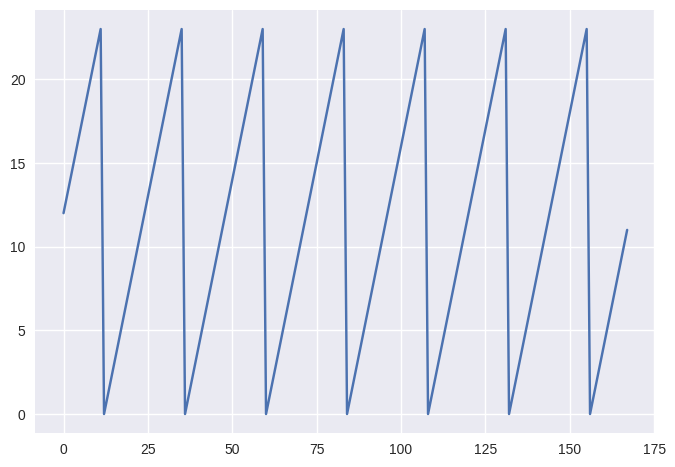

In [9]:
ax = sample['hour'].plot()

##Encoding Cyclical Features

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [10]:
data['hour_sin'] = np.sin(2 * np.pi * data['hour']/24.0)
data['hour_cos'] = np.cos(2 * np.pi * data['hour']/24.0)

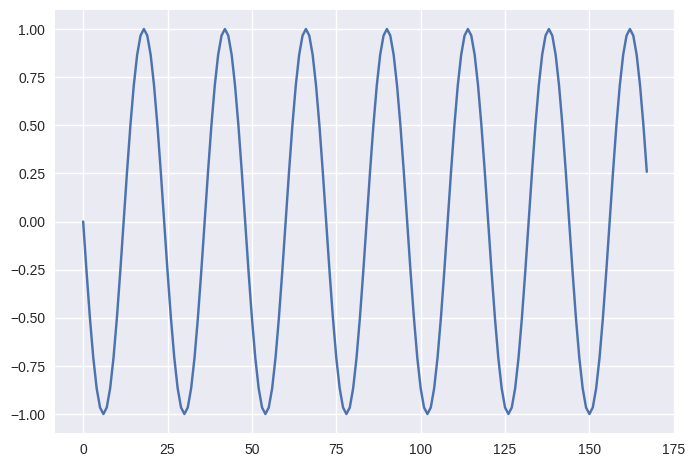

In [11]:
sample = data[0:168]
ax = sample['hour_sin'].plot()

In [12]:
sample[10:26]

,datetime,temperature,hour,hour_sin,hour_cos
10,2012-10-01 22:00:00,12.789767,22,-5.000000e-01,8.660254e-01
11,2012-10-01 23:00:00,12.802906,23,-2.588190e-01,9.659258e-01
12,2012-10-02 00:00:00,12.816046,0,0.000000e+00,1.000000e+00
13,2012-10-02 01:00:00,12.829185,1,2.588190e-01,9.659258e-01
14,2012-10-02 02:00:00,12.842325,2,5.000000e-01,8.660254e-01
15,2012-10-02 03:00:00,12.855465,3,7.071068e-01,7.071068e-01
16,2012-10-02 04:00:00,12.868604,4,8.660254e-01,5.000000e-01
17,2012-10-02 05:00:00,12.881744,5,9.659258e-01,2.588190e-01
18,2012-10-02 06:00:00,12.894883,6,1.000000e+00,6.123234e-17
19,2012-10-02 07:00:00,12.908023,7,9.659258e-01,-2.588190e-01


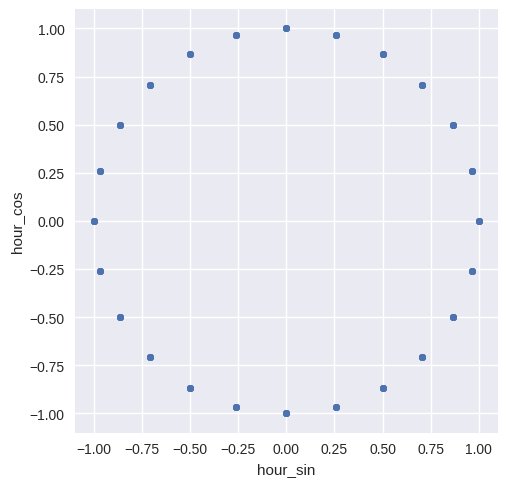

In [13]:
ax = sample.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

##create a model that attempts to predict the temperature in Montreal

In [14]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [15]:
data['month'] = data.datetime.dt.month
data = encode(data, 'month', 12)

data['day'] = data.datetime.dt.day
data = encode(data, 'day', 31)

In [16]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)

In [17]:
# Building the model

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation
from keras.optimizers import Adam

def train_model(X_train, y_train, X_test, y_test, epochs):
    model = Sequential(
        [
            Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
            Dense(10, activation="relu"),
            Dense(10, activation="relu"),
            Dense(1, activation="linear")
        ]
    )
    model.compile(optimizer=Adam(), loss="mean_squared_error")

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
    return model, history

##build a model using the unencoded features.

In [18]:
def get_unencoded_features(df):
    return df[['month', 'day', 'hour']]

In [19]:
X_train = get_unencoded_features(data_train)
X_test  = get_unencoded_features(data_test)
y_train = data_train.temperature
y_test  = data_test.temperature

In [20]:
model_unencoded, unencoded_hist = train_model(
    get_unencoded_features(data_train),
    data_train.temperature,
    get_unencoded_features(data_test),
    data_test.temperature,
    epochs=5
)

Epoch 1/5
849/849 [==============================] - 3s 3ms/step - loss: 140.0129 - val_loss: 117.5007
Epoch 2/5
849/849 [==============================] - 2s 3ms/step - loss: 98.6940 - val_loss: 88.5559
Epoch 3/5
849/849 [==============================] - 2s 2ms/step - loss: 72.8364 - val_loss: 65.4310
Epoch 4/5
849/849 [==============================] - 2s 3ms/step - loss: 54.7392 - val_loss: 47.8490
Epoch 5/5
849/849 [==============================] - 3s 4ms/step - loss: 40.7555 - val_loss: 39.4011


##Encoded features

In [21]:
def get_encoded_features(df):
    return df[['month_sin', 'month_cos', 'day_sin', 'day_cos', 'hour_sin', 'hour_cos']]

In [22]:
X_train = get_encoded_features(data_train)
X_test  = get_encoded_features(data_test)
y_train = data_train.temperature
y_test  = data_test.temperature

In [23]:
model_encoded, encoded_hist = train_model(
    get_encoded_features(data_train),
    data_train.temperature,
    get_encoded_features(data_test),
    data_test.temperature,
    epochs=5
)

Epoch 1/5
849/849 [==============================] - 4s 4ms/step - loss: 58.6801 - val_loss: 29.9396
Epoch 2/5
849/849 [==============================] - 2s 3ms/step - loss: 28.5701 - val_loss: 28.8565
Epoch 3/5
849/849 [==============================] - 2s 3ms/step - loss: 27.9348 - val_loss: 28.5503
Epoch 4/5
849/849 [==============================] - 2s 3ms/step - loss: 27.6524 - val_loss: 28.4988
Epoch 5/5
849/849 [==============================] - 2s 3ms/step - loss: 27.4598 - val_loss: 28.1396


##**Comparison**

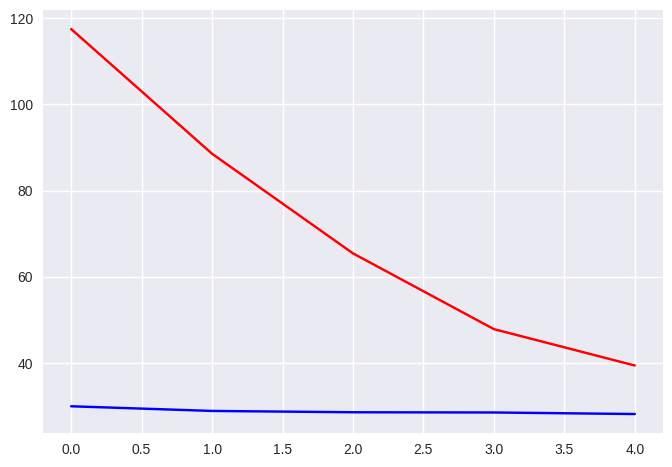

In [24]:
plt.plot(unencoded_hist.history['val_loss'], "r")
ax = plt.plot(encoded_hist.history['val_loss'], "b")

In [25]:
X_val_unencoded  = get_unencoded_features(data_val)
X_val_encoded  = get_encoded_features(data_val)
y_val = data_val.temperature

In [30]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error for unencoded and encoded models
mse_unencoded = mean_squared_error(y_val, model_unencoded.predict(X_val_unencoded))
mse_encoded = mean_squared_error(y_val, model_encoded.predict(X_val_encoded))

# Print MSE values
print(f'Mean Squared Error (Unencoded): \033[91m{mse_unencoded:.4f}\033[0m')
print(f'Mean Squared Error (Encoded): \033[92m{mse_encoded:.4f}\033[0m')

# Calculate and print the improvement percentage
improvement_percentage = (mse_unencoded - mse_encoded) / mse_unencoded * 100
print(f'\nWe achieved an improvement of \033[94m{improvement_percentage:.2f}%\033[0m in our MSE')


283/283 [==============================] - 0s 1ms/step
Mean Squared Error (Unencoded): 39.1347
Mean Squared Error (Encoded): 27.7243

We achieved an improvement of 29.16% in our MSE
